# Simulated Annealing

In this tutorial, we show how to apply simulated annealing to one of the well-known unconstrained optimization problem from bioinformatics and financial engineering. Next tutorial we will embrace more advanced version of the topics covered in this tutorial, which is the constrained version of the problem. But, we are just focusing on the unconstrained part of the problem for the sake of simplicity.

We are given the following function, which is known as the six hump camelback function where x lies between -3 and 3 and y lies between -2 and 2.
<br>
\begin{align}
    f(x,y) = 4x^{2} + 2x^{4} + (1/3)x^{6} + xy - 4y^{2} + 4y^{4}
\end{align}

### 1. Import Required Libraries

In [1]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
from pylab import meshgrid
import numpy as np
import random 
import math

#### 1.1. Random Seed

In [2]:
random.seed(521)

### 2. Camelback Function and Its Plot

In [3]:
def six_humb_camelback_function(x, y):
    
    return 4*(x**2) - 2*(x**4) + (1/3)*(x**6) + x*y - 4*(y**2) + 4*(y**4)

In [4]:
def plot_the_function():
    
    x = np.arange(-3, +3, 0.01)
    y = np.arange(-2, +2, 0.01)
    
    X,Y = meshgrid(x, y)
    Z = six_humb_camelback_function(X, Y)
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z)
    
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    
    ax.set_xlim([-3, +3])
    ax.set_ylim([-2, +2])
    
    plt.show()

Let's plot the feasible region in which we are trying to find the optimal solution.

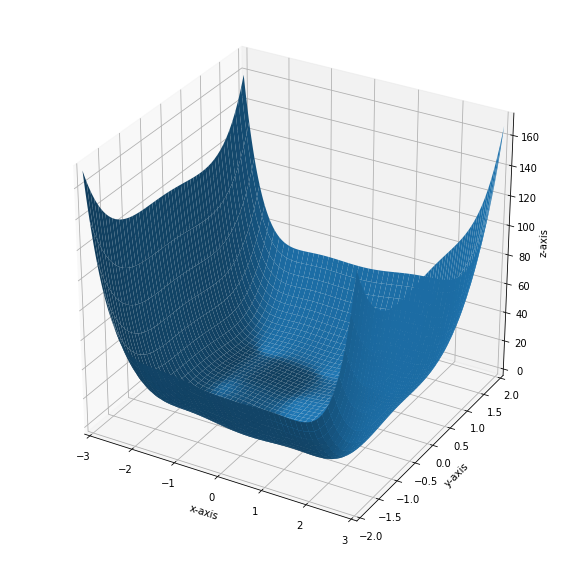

In [5]:
plot_the_function()

### 3. Functions Related to the Algorithm

#### 3.1. Move Operator

The move operator first generates a random number $\alpha$ between 0 and 1. 
<br>
If $\alpha \geq 0.5$, then the change will occur on $x$; If $\alpha < 0.5$ then the change will be on $y$. 
<br>
Secondly, we generate another random variable called $\beta$ between -1 and 1. 
<br>
If the change is processed on $x$, then new $x$ value is determined by following equation:
<br>
$x^{new} = x^{old} + \beta \cdot 0.2$
<br>
If the change is processed on $y$, then new $y$ value is determined by following equation:
<br>
$y^{new} = y^{old} + \beta \cdot 0.3$

In [6]:
def move(solution):
    """
    solution is a list like [x,y]
    """
    alpha = random.uniform(0, 1)
    if alpha >= 0.5:
        x = solution[0]
        beta = random.uniform(-1, 1)
        return (x+beta*0.2, solution[1])
    else:
        y = solution[1]
        beta = random.uniform(-1, 1)
        return (solution[0], y+beta*0.3)

#### 3.2. Cooling Schedule

We illustrate the characteristics of two different cooling schedules. However, you can find other alternatives as well.

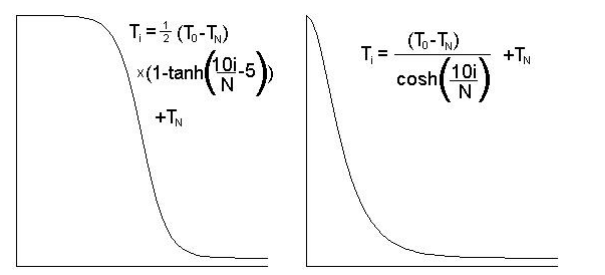

In [7]:
from IPython.display import Image
Image(filename='cooling_schedules.png')

In [8]:
def cooling_fast(i, T_0, T_N, N):
    return (T_0-T_N)/math.cosh((10*i)/N) + T_N

In [9]:
def cooling_slow(i, T_0, T_N, N):
    return 0.5*(T_0-T_N)*(1-math.tanh(((10*i)/N)-5))+T_N

#### 3.3. Simulated Annealing as a Maximum Iteration Number Criteria

In [10]:
currents, temps, bests = [], [], []

Here, we control the termination of the algorithm with a parameter called max_iter which indicates the maximum number of iterations for the algorithm.

In [11]:
max_iter = 1000

We can randomly select our initial solution and model parameters.

In [12]:
initial_solution = [1, 1]
initial_temperature = 10
final_temperature = 1

In [13]:
best_solution = initial_solution
best_value = six_humb_camelback_function(initial_solution[0], initial_solution[1])

In [14]:
current_solution = initial_solution
current_value = best_value
temperature = initial_temperature

In [15]:
temps.append(temperature)

This part accumulates the statistics to facilitate the plotting

In [16]:
best_x = []
best_y = []
best_x.append(best_solution[0])
best_y.append(best_solution[1])
bests.append(best_value)

current_x = []
current_y = []
current_x.append(current_solution[0])
current_y.append(current_solution[1])
currents.append(current_value)

neg_x = []
neg_y = []
negs = []

neg_x.append(current_solution[0])
neg_y.append(current_solution[1])
negs.append(current_value)

And finally our algorithm is starting :) 

In [17]:
iter_no = 1
while iter_no < max_iter:
    
    neighbor_sol = move(current_solution)
    neighbor_val = six_humb_camelback_function(neighbor_sol[0], neighbor_sol[1])
    
    if neighbor_val < current_value:
        current_solution = neighbor_sol
        current_value = neighbor_val
        
        if neighbor_val < best_value:
            best_solution = neighbor_sol
            best_value = neighbor_val
    else:
        
        tmp = random.uniform(0,1)
        diff = neighbor_val - current_value
        
        if tmp < math.exp((-diff)/temperature):
            current_solution = neighbor_sol
            current_value = neighbor_val

    temperature = cooling_fast(iter_no, initial_temperature, final_temperature, max_iter)
    currents.append(current_value)
    temps.append(temperature)
    bests.append(best_value)
    
    best_x.append(best_solution[0])
    best_y.append(best_solution[1])
    current_x.append(current_solution[0])
    current_y.append(current_solution[1])
    neg_x.append(neighbor_sol[0])
    neg_y.append(neighbor_sol[1])
    negs.append(neighbor_val)
    
    iter_no += 1

#### Plotting

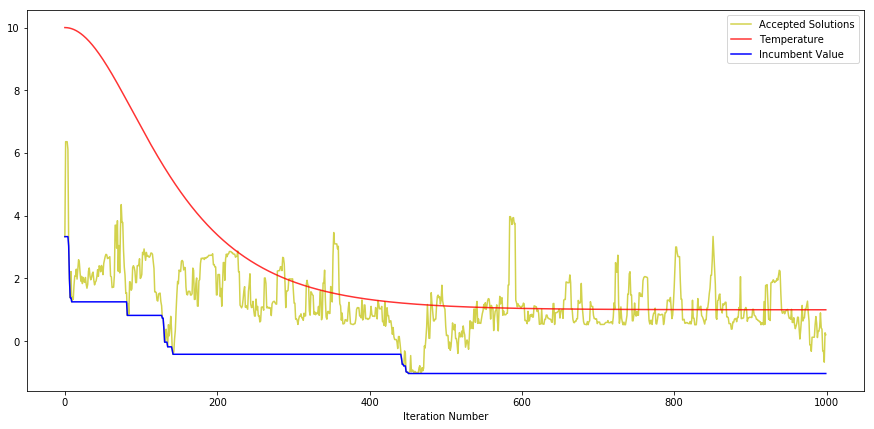

In [18]:
plt.figure(figsize=(15, 7))
plt.plot(list(range(len(bests))), currents, c='y', alpha = 0.7, label='Accepted Solutions')
plt.plot(list(range(len(bests))), temps, c='r', alpha = 0.8, label='Temperature')
plt.plot(list(range(len(bests))), bests, c='b', label='Incumbent Value')
plt.xlabel('Iteration Number')
plt.legend()
plt.show()

In [19]:
print(best_solution)
print(best_value)

(0.09625874401232766, -0.7165255949270669)
-1.031361116127861


In [31]:
def plot_solution_on_space():
    
    x = np.arange(-3, +3, 0.01)
    y = np.arange(-2, +2, 0.01)
    
    X,Y = meshgrid(x, y)
    Z = six_humb_camelback_function(X, Y)
    fig = plt.figure(figsize=(10,10))
    
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(X, Y, Z, color='grey', alpha = 0.70)
    
    ax.plot(best_x, best_y, bests, color = 'r', label='Incumbent Values Over Iterations')
    ax.plot(current_x, current_y, currents, color='b', alpha = 0.40, label= 'Value of Accepted Solutions Over Iterations')
    
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    
    ax.set_xlim([-3, +3])
    ax.set_ylim([-2, +2])
    
    ax.legend(loc='best')
    plt.show()

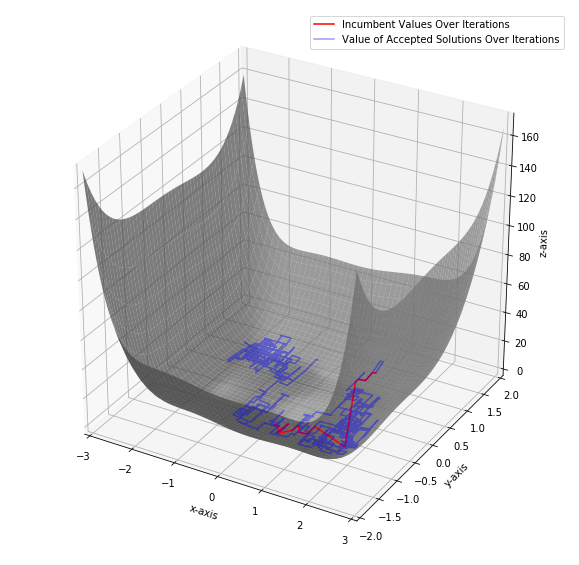

In [32]:
plot_solution_on_space()